[목표]
- 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 만들어보자
- 머신러닝 전체 과정의 흐름을 이해해보자

### 문제정의
- 머신러닝을 통해서 어떤 문제를  해결할 것인가?
- 지도 vs 비지도 vs 강화
- 지도 : 정답과 문제를 알려주고 선택, 분류와 회귀로 구분 됨.
- 비만을 판단하는 모델을 만들자 ==> 지도학습 - 분류

### 데이터 수집
- csv 파일로 이루어진 데이터수집
- 500명의 성별, 키, 몸무게, 비만도 등급

In [4]:
# 데이터 꺼내오기
import pandas as pd
bmi=pd.read_csv('./Data/bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 데이터 전처리
- 1. 결측치 처리 : 비어있는 데이터를 채워주기
- 2. 이상치 처리 : 정상적인 범위를 벗언나 데이터 수정하기

#### 결측치 확인
- 데이터 프레임의 형태를 갖춘후 info() 함수 사용

In [5]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


#### 이상치 확인
- 데이터 프레임의 형태를 갖춘 후 describe() 함수 사용
- describe() : 수치형 데이터만 분석가능, 기술통계

In [7]:
bmi.describe()
# count : 데이터 수
# mean : 평균 값
# std : 표준 편차
# min : 최소값
# 25% : 1분위수 
# 50% : 중앙값
# 75% : 3분위수
# max : 최대값

# 1, min, max 확인하기
# 2. 평균(mean), 중앙값(50%) 확인하기 ==> 두 수치가 비슷한지 확인
# 3. 두 수치가(평균, 중앙값)가 비슷하지 않을 경우 : min ~ max까지 5개의 간격을 확인하기 
# ==> 각 구간의 데이터가 고르게 분포가 되어있는지 확인 


# 우리의 데이틑 정상적으로 판단이 됨.

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 데이터 탐색 분석(EDA)
- 데이터를 자세하게 살펴보자
- 비만도별로 데이터가 잘 나뉘어져 있는지 확인

#### 비만도 등급 확인 

In [8]:
# 중복  값은 제거하고 확인 - unique()
bmi['Label'].unique()

#'Obesity', 비만
#'Normal',  정상
#'Overweight', 과체중
#'Extreme Obesity', 고도비만
#'Weak',    저체중
#'Extremely Weak'  극심한 저체중

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

#### Label이 Weak인 사람들만 추려보기

In [16]:
# 불리언 인덱싱
# bmi[bmi['Label'] == 'Weak']

bol = bmi['Label'] == 'Weak' # 불리언 인덱싱한 결과를 사용하기 위해 변수에 저장
data = bmi.loc[bol] # 라벨이 Weak인 전체 행에 대한 데이터를 가져옴
data 

,Gender,Height,Weight,Label
27,Male,187,62,Weak
31,Male,178,52,Weak
32,Female,195,65,Weak
51,Female,176,54,Weak
98,Male,195,69,Weak
200,Male,184,57,Weak
242,Male,191,62,Weak
269,Male,168,50,Weak
279,Male,188,57,Weak
280,Male,193,65,Weak


#### Weak인 사람들을 그래프로 그려보기 
- 산점도 그래프로 확인하기

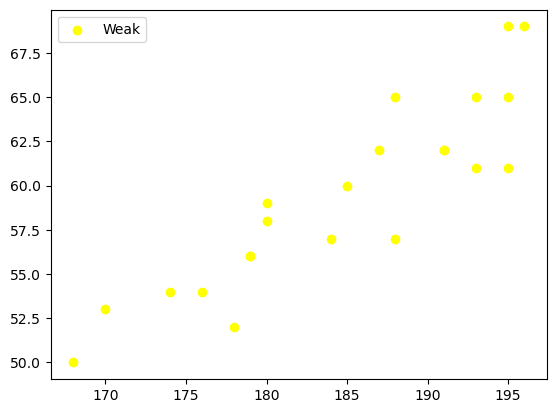

In [26]:
# 그래프 그려주는 도구 꺼내오기 
import matplotlib.pyplot as plt

#plt.scatter(x, y) # x축 : 키값, y축 : 몸무게값
plt.scatter(data['Height'], data['Weight'],
           color = 'yellow', label = 'Weak')
plt.legend() # 그래프에 범례(label) 표시 
plt.show()

#### OverWeight 그래프 그리기
- 보라색으로 그리기

In [38]:
def myScatter(label, color) : 
    bol2 = bmi['Label'] == label # Overweight의 비만도인 불리언 인덱싱값 변수 저장
    data2 = bmi.loc[bol2] # 변수값에 대한 전체 행에 대한 데이터를 가져옴 -> 변수로 저장
    plt.scatter(data2['Height'], data2['Weight'],
               color = color, label = label)

In [39]:
#### 전체 그래프 그리기

#### 함수로 만들어져 그래프 그리기
- 반복되는 부분을 함수로 간략화

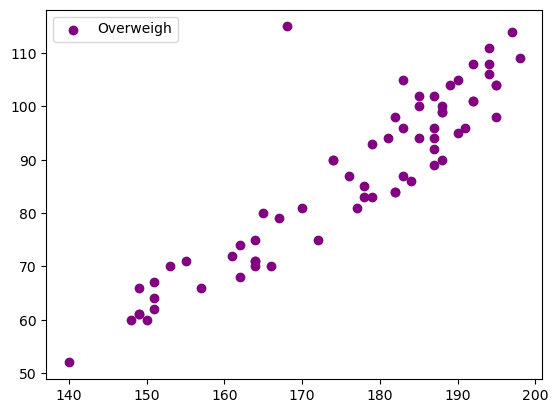

In [36]:
plt.scatter(data2['Height'], data2['Weight'],
           color = 'purple', label = 'Overweigh')
plt.legend()  # 그래프에
plt.show()

#### 전체 그래프 그리기

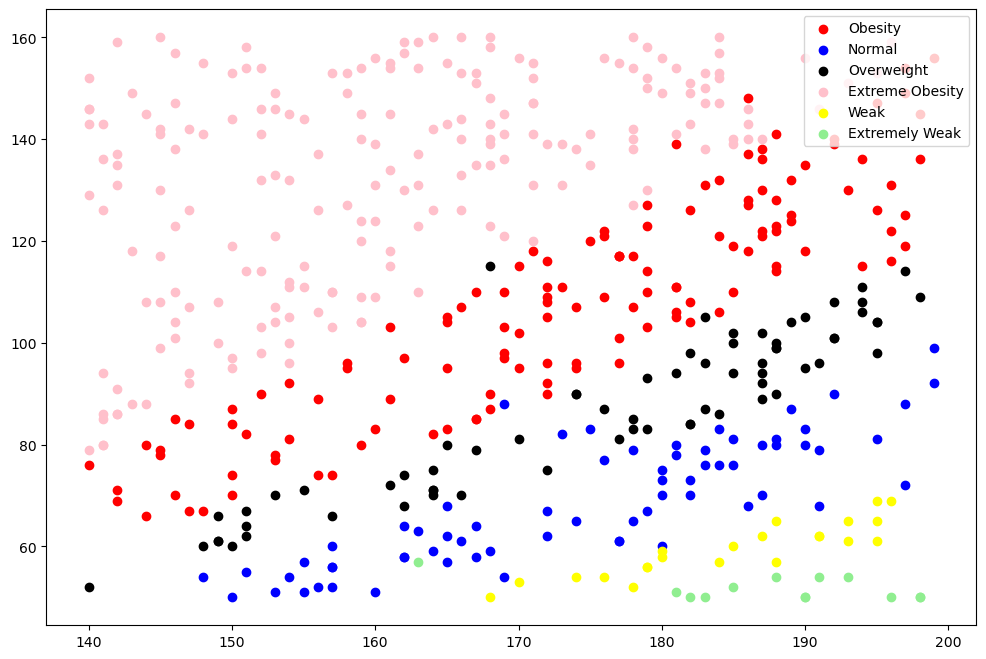

In [55]:
plt.figure(figsize=(12, 8))  # 그래프의 크기 사이즈를 조절하는 함수, 그래프 그리기 전에 크기를 조정하며, 크기는 인치로 적용됨.

myScatter('Obesity', 'red')
myScatter('Normal',  'blue')
myScatter('Overweight','black')
myScatter('Extreme Obesity', 'pink')
myScatter('Weak',   'yellow')
myScatter('Extremely Weak', 'lightgreen')
plt.legend()
plt.show()

In [43]:
bmi[bmi['Label'] == 'Normal'] # 우리가 찾으려는 값 : 153정도의 키, 78정[도의 몸무게
h_153 = bmi[bmi['Height'] == 153] #231번째의 비만도는 Noraml이 아니라 obestiy로 변경해야함
h_153

,Gender,Height,Weight,Label
15,Female,153,107,Extreme Obesity
21,Female,153,149,Extreme Obesity
30,Male,153,121,Extreme Obesity
70,Female,153,51,Normal
212,Female,153,146,Extreme Obesity
231,Female,153,78,Normal
250,Male,153,70,Overweight
322,Male,153,104,Extreme Obesity
428,Female,153,77,Obesity
436,Female,153,133,Extreme Obesity


In [44]:
# 키가 153이고 몸무게가 78킬로인 여성을 Normal로 잘못 표기된 것을 Obesity로 수정 
bmi.loc[231, 'Label'] = 'Obesity'

In [54]:
bmi.loc[bmi['Weight'] == 78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Obesity
234,Male,145,78,Obesity


### 모델 선택및 하이퍼파라미터 튜닝
- 머신러닝의 모델을 불러와서 사용하는 단계
- 모델을 가져와서 학습과 학습용과 검증용으로 해야함.

### 학습

### 평가